<a href="https://colab.research.google.com/github/sakshighugare/Netflix-movies-and-TV-shows-clustering/blob/main/UNSUPERVISED_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **NETFLIX MOVIES AND TV SHOWS CLUSTERING**
  


##### **Project Type**    -Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -**Divya Kedia
##### **Team Member 2 -**Sakshi Ghugare


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objects as go
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns 
%matplotlib inline

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Netflix Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Dataset Size")
print("Rows = {} and  Columns = {}".format(df.shape[0], df.shape[1]))

Dataset Size
Rows = 7787 and  Columns = 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


<Axes: >

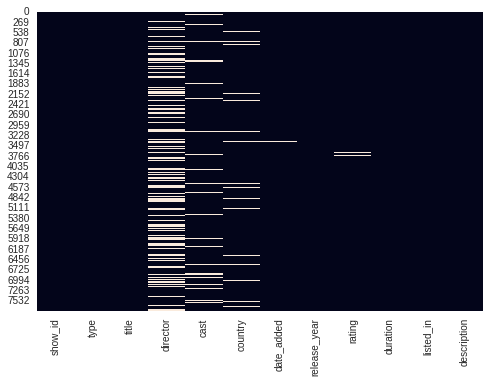

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar = False)

### What did you know about your dataset?

Answer Here
The dataset used for Netflix movies and TV shows clustering includes information on multiple features of the titles, such as genre, director, cast, rating, release year, duration, and type. It consists of 7787 rows and 12 columns.

However, some columns, such as director, cast, and country, contain null values that need to be addressed during the data analysis process.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

**show_id** : Unique ID for every Movie / Tv Show

**type** : Identifier - A Movie or TV Show

**title** : Title of the Movie / Tv Show

**director** : Director of the Movie

**cast** : Actors involved in the movie / show

**country** : Country where the movie / show was produced

**date_added** : Date it was added on Netflix

**release_year** : Actual Releaseyear of the movie / show

**rating** : TV Rating of the movie / show

**duration** : Total Duration - in minutes or number of seasons

**listed_in** : Genre

**description** : The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("Unique values in ", i , "are" , df[i].nunique(), ".")

Unique values in  show_id are 7787 .
Unique values in  type are 2 .
Unique values in  title are 7787 .
Unique values in  director are 4049 .
Unique values in  cast are 6831 .
Unique values in  country are 681 .
Unique values in  date_added are 1565 .
Unique values in  release_year are 73 .
Unique values in  rating are 14 .
Unique values in  duration are 216 .
Unique values in  listed_in are 492 .
Unique values in  description are 7769 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
# Summing null values
print('Missing Data Count')
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

Missing Data Count


director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64

In [ ]:
print('Missing Data Percentage')
print(round(df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)/len(df)*100,2))

Missing Data Percentage
director      30.68
cast           9.22
country        6.51
date_added     0.13
rating         0.09
dtype: float64


In [ ]:
# The missing values in the 'director', 'cast', and 'country' columns can be replaced with the label 'Unknown'.

In [ ]:
df[['director']] = df[['director']].fillna('Unknown')
df[['cast']]     = df[['cast']].fillna('Unknown')
df[['country'] ] = df[['country']].fillna('Unknown')

In [ ]:
# We cannot replace missing values in the 'date_added' column. 
# And since they constitute a small and relatively unimportant portion of the data.
# Therefore, we will exclude these values from our analysis.

In [ ]:
df.dropna(subset=['date_added'], inplace=True)

In [ ]:
df.shape

(7777, 12)

In [ ]:
# For the missing values in the 'rating' column, we can impute them with the mode since this attribute is discrete.

In [ ]:
df['rating'].fillna(value=df['rating'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# To simplify the analysis, we will choose the primary country and primary genre for each entry in the dataframe.

In [ ]:
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [ ]:
# We will transform the 'duration' column in the dataframe by splitting the string value 
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
# datatype of duration
df.duration.dtype

dtype('int64')

In [ ]:
print("Columns and data types")
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,int64


In [ ]:
#Convert timestamp to datetime format to fetch the other details
df["date_added"] = pd.to_datetime(df['date_added'])

In [ ]:
#addding new column to dataframe such as 'month_added'and 'year_added' to gain more insights from the data 
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [ ]:
# Changing the values in the rating column
# Create a dictionary to map the current ratings to new ratings
rating_map = {'TV-MA':'Adults',
'R':'Adults',
'PG-13':'Teens',
'TV-14':'Young Adults',
'TV-PG':'Older Kids',
'NR':'Adults',
'TV-G':'Kids',
'TV-Y':'Kids',
'TV-Y7':'Older Kids',
'PG':'Older Kids',
'G':'Kids',
'NC-17':'Adults',
'TV-Y7-FV':'Older Kids',
'UR':'Adults'}
# Replace the current ratings with the new ratings using the mapping dictionary
df['rating'].replace(rating_map,inplace=True)
# Print the unique values in the 'rating' column to verify that the changes have been made
print(df['rating'].unique())

['Adults' 'Teens' 'Young Adults' 'Older Kids' 'Kids']


### What all manipulations have you done and insights you found?

1) Replaced missing values in the 'director', 'cast', and 'country' columns with the label 'Unknown'.

2) Imputing missing values in the 'rating' column with the mode.

3) Choosed the primary country and primary genre for each entry in the dataframe to simplify the analysis.

4 )Transformed the 'duration' column in the dataframe by splitting the string value on whitespace delimiter and converting it into an integer datatype.

5)Converted the timestamp in the 'date_added' column to datetime format to fetch other details.And added new columns to the dataframe, such as 'month_added' and 'year_added', to gain more insights from the data.

6)Changed the values in the rating column by Creating a dictionary to map the current ratings to new ratings.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1. Show Type(Univariate)

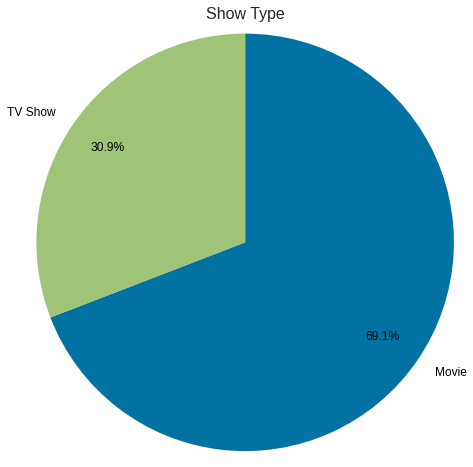

In [ ]:
# Chart - 1 visualization code
#Pie chart for type of shows
show_type = df["type"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(show_type, labels=show_type.index, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1, 
        radius=1.2, startangle=90, 
        textprops=dict(color="black", fontsize=12), counterclock=False)
plt.title('Show Type', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart represents the contribution of each part of the data to a whole and it makes very easy to understand the data.Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time. Which was exactly needed thus we selected pie chart.

##### 2. What is/are the insight(s) found from the chart?

On Netflix, movies make up 69.1% of the overall material while TV shows make up 30.9%.
The distribution of movies and TV shows in the Netflix dataset is not equal, which indicates that Netflix has a preference towards movies.

The number of TV shows in the dataset is still significant, which suggests that Netflix also invests in producing and acquiring TV shows for its platform.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart may help create a positive business impact for Netflix. Knowing that the majority of the content in the Netflix dataset is Movies, and that Netflix has a preference towards Movies, may inform decisions related to content production and acquisition. For instance, Netflix may choose to allocate more resources towards producing and acquiring Movies in order to attract more viewers and subscribers.

#### Chart - 2. Top 10 Genres(Univariate)

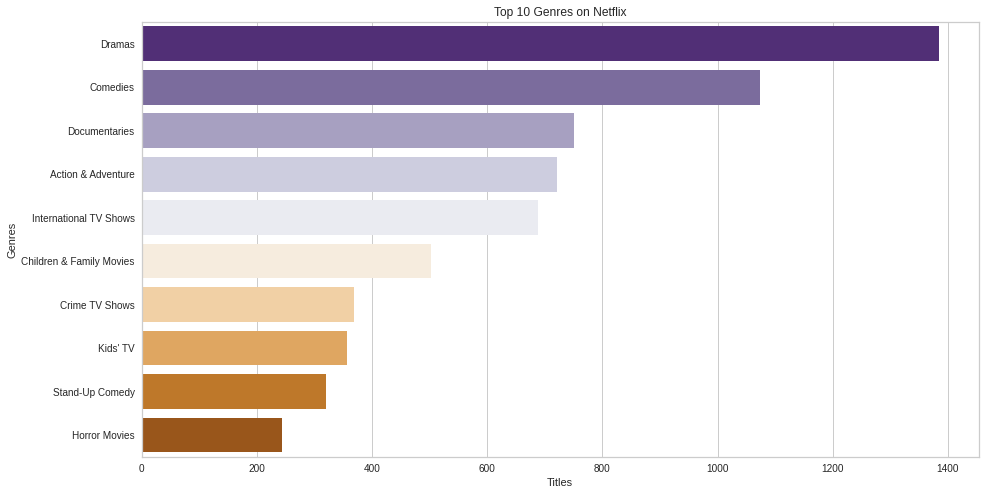

In [ ]:
# Chart - 2 visualization code
#Plotting a barplot for getting top 20 genres
# Seprating Genres
genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

# ploting graph for top 10 genres
plt.figure(figsize=(15,8))
g = sns.countplot(y = genres, order=genres.value_counts().index[:10],palette = "PuOr_r")
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

##### 1. Why did you pick the specific chart?

Countplot is used to visualize the frequency or count of occurrences of a categorical variable. It helps to understand the distribution of the variable by showing the number of observations in each category. The countplot is a bar graph, with the height of each bar representing the count of observations in each category. It provides a simple and easy way to compare the count of observations in different categories.

##### 2. What is/are the insight(s) found from the chart?

*   From the graph we can see Dramas is the most popular genre.
*   Comedies is the second most popular.
*   Documentries, Action & Adventure, International TV shows have almost equal numbers which places them in 3rd place.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the chart can help create a positive business impact by allowing Netflix to better understand the content preferences of their audience. They can use this information to make more informed decisions about what type of content to acquire and produce, which can help increase their viewership and revenue.

#### Chart - 3. Top 10 Directors(Univariate)

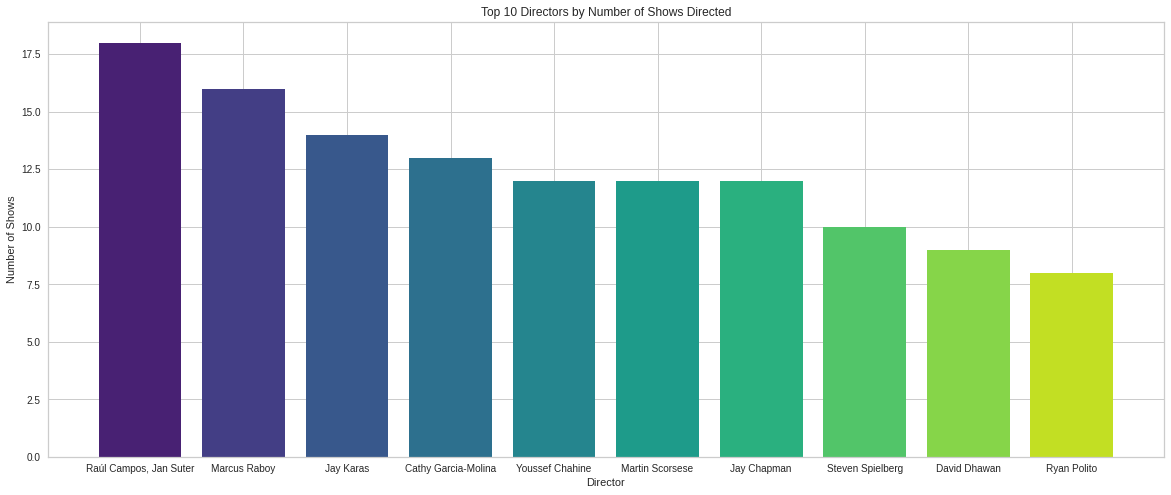

In [ ]:
# Chart - 3 visualization code
# Filter out the rows where the director is unknown, count the number of shows for each director, and plot the top 10
top_directors = df.loc[df['director'] != 'Unknown', 'director'].value_counts().nlargest(10)
plt.figure(figsize=(20,8))
colors = sns.color_palette('viridis', n_colors=10)
plt.bar(top_directors.index, top_directors.values, color=colors)
plt.title('Top 10 Directors by Number of Shows Directed')
plt.xlabel('Director')
plt.ylabel('Number of Shows')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.The characteristics that make a good bar graph are as follows: Easy comparisons between different variables. Clarity in displaying trends in data. Easy determination in the value of a variable.

##### 2. What is/are the insight(s) found from the chart?

1) The top director by the number of shows directed is Raul Campos, Jan Suter who directed 18 shows in the dataset.

2) The second most popular director is Marcus Raboy, who directed 16 shows.

3) Most of the top 10 directors have directed between 7-11 shows on Netflix.

4) The top 10 directors are mostly from the US, except for David Dhawan from India, who directed 9 shows on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights may help inform decisions related to content production and acquisition, as they provide information about the most popular directors on Netflix and their past work.

#### Chart - 4. Top 10 Actors (Univariate)

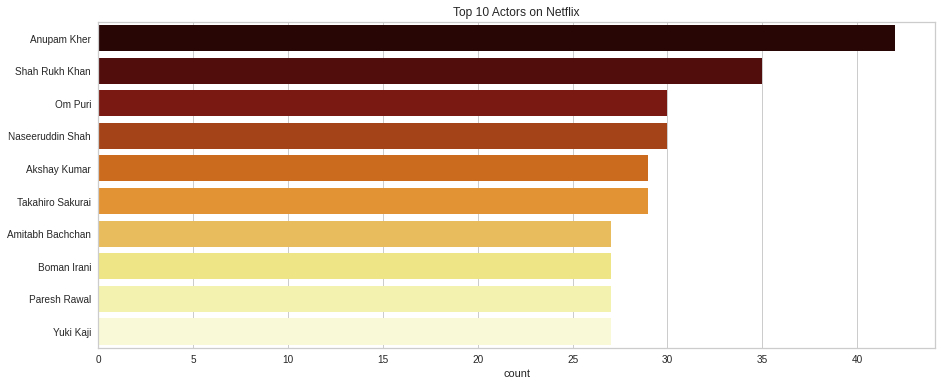

In [ ]:
# Chart - 4 visualization code
# Graph for top 10 actors
plt.figure(figsize=(15, 6))
actor = df[df.cast != 'Unknown'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = actor, order=actor.value_counts().index[:10], palette='afmhot')
plt.title('Top 10 Actors on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

Countplot is used to visualize the frequency or count of occurrences of a categorical variable. It helps to understand the distribution of the variable by showing the number of observations in each category. The countplot is a bar graph, with the height of each bar representing the count of observations in each category. It provides a simple and easy way to compare the count of observations in different categories.

##### 2. What is/are the insight(s) found from the chart?

The chart provides several insights into the most popular actors on Netflix, including:

1) The top actor by the number of shows they appeared in is Anupam Kher, who appeared in 42 shows in the dataset.

2) The second most popular actor is Shah Rukh Khan, who appeared in 35 shows.

3) Most of the top 10 actors have appeared in between 25-30 shows on Netflix.

4) The top 10 actors are mostly from India, with the exception of Takahiro Sakurai and Yuki Kaji from the Japan.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1) By knowing the most popular actors on the platform, Netflix can acquire or produce content that features these actors, which could increase the number of viewership and engagement on their platform.

2) The insights can also help in identifying the target audience for different titles, as different actors may appeal to different demographics.

3) The data can also help Netflix identify trends and preferences among its user base, which could help inform decisions related to content acquisition and production.

#### Chart - 5. Top 10 Countries

Text(0, 0.5, 'Country')

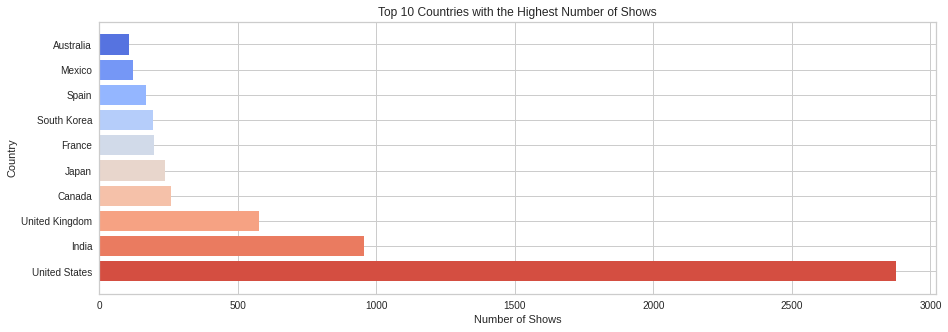

In [ ]:
# Chart - 5 visualization code
# Get the top 10 countries with the highest number of movies and TV shows in the dataset
top_countries = df.loc[df['country'] != 'Unknown', 'country'].value_counts().nlargest(10)
plt.figure(figsize=(15,5))
colors = sns.color_palette('coolwarm_r', n_colors=10)
plt.barh(top_countries.index, top_countries.values, color=colors) # Plot a horizontal bar chart
plt.title('Top 10 Countries with the Highest Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')

##### 1. Why did you pick the specific chart?

Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.The characteristics that make a good bar graph are as follows: Easy comparisons between different variables. Clarity in displaying trends in data. Easy determination in the value of a variable.



##### 2. What is/are the insight(s) found from the chart?

The chart shows that the United States is by far the largest producer of movies and TV shows in the dataset, with over 2,500 titles. The next highest producing countries are India, the United Kingdom, and Canada, each with around 500-1000 titles. Other countries in the top 10 include France, Japan, and Spain. The top 3 countries (USA, India, UK) account for 56.69% of shows in the dataset, while the top 10 countries account for 73.19% of shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can definitely help create a positive business impact. For instance, knowing that the US is the largest producer of movies and TV shows can help streaming companies plan their content acquisition strategy and marketing efforts accordingly. Additionally, the insight that the top 3 countries account for over half of the shows in the dataset can help companies focus their attention on these markets to maximize their viewership.

#### Chart - 6. Ratings(Univariate)

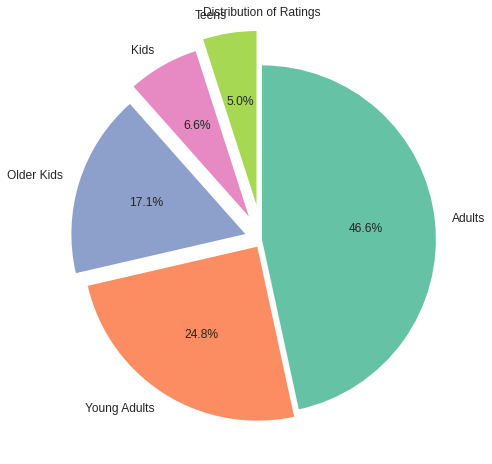

In [ ]:
# Chart - 6 visualization code
df_rating = df['rating'].value_counts()
plt.figure(figsize=(8,8))
palette_color =sns.color_palette('Set2')
explode = [0,0.05, 0.1,0.15,0.20]
plt.pie(df_rating.values, labels=df_rating.index, colors=palette_color,explode=explode,textprops={'fontsize': 12},
        autopct='%1.1f%%',startangle=90, counterclock=False)
plt.title('Distribution of Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart represents the contribution of each part of the data to a whole and it makes very easy to understand the data.Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time. Which was exactly needed thus we selected pie chart.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can see that the most common rating in the Netflix dataset is Adults (TV-MA - Mature Audiences), which accounts for almost 47% of all titles. This is followed by Young Adults (TV-14 - Parents Strongly Cautioned) and Older Kids (TV-PG - Parental Guidance Suggested), which account for about 25% and 17% of titles, respectively.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights could help create a positive business impact by informing decisions about content acquisition and creation. For example, the fact that TV-MA is the most common rating suggests that there is a strong demand for mature content on the platform, which could inform decisions about which types of content to acquire or produce.

#### Chart - 7. Year of Movie/Show release(Univariate)

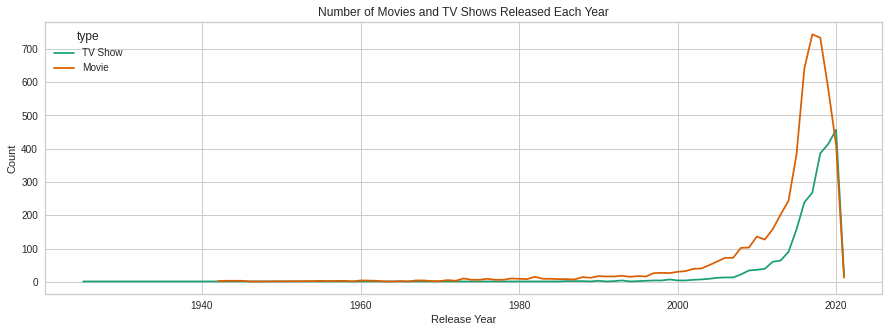

In [ ]:
# Chart - 7 visualization code
df_release_year = df.groupby(['release_year', 'type'])['show_id'].count().reset_index()
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_release_year, x='release_year', y='show_id', hue='type', palette="Dark2")
plt.title('Number of Movies and TV Shows Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [ ]:
tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]

col = "year_added"

content_1 = tv_show[col].value_counts().reset_index()
content_1 = content_1.rename(columns = {col : "count", "index" : col})
content_1 = content_1.sort_values(col)

content_2 = movie[col].value_counts().reset_index()
content_2 = content_2.rename(columns = {col : "count", "index" : col})
content_2 = content_2.sort_values(col)

trace1 = go.Scatter(x=content_1[col], y=content_1["count"], name="TV Shows", marker=dict(color='#914540'))
trace2 = go.Scatter(x=content_2[col], y=content_2["count"], name="Movies", marker=dict(color='#22274a'))

data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", title_x=0.47, legend=dict(x=0.4, y=1.1, orientation="h"),
                   xaxis_title="Year", yaxis_title="Count")
fig = go.Figure(data, layout=layout)

fig.show()

##### 1. Why did you pick the specific chart?

One common graphing tool is the histogram. It is employed to present interval-scaled summaries of discrete or continuous data. It is frequently used to conveniently depict the main characteristics of the data distribution. Additionally, it is helpful when working with enormous data sets (greater than 100 observations). It can assist in finding any anomalous observations (outliers) or data gaps.

A line chart is used to represent data over time or to display the trend of a single data set over time. Line charts are used to see changes in data over time and to see overall trends such as an increase or decrease in data. Line charts are particularly useful when large amounts of data are involved and when it is necessary to make a comparison between several data sets.

##### 2. What is/are the insight(s) found from the chart?

We can observe the number of movies and TV shows released each year, which can provide us insights on the trend of media content production over the years.

We can see that the number of movies produced has increased significantly from the mid-2000s to 2020.

The number of TV shows produced has also increased, but not as much as TV shows.

The chart also shows a dip in movie production in 2020, which may be due to the COVID-19 pandemic.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help in creating a positive business impact, as it can provide valuable information for content creators, streaming platforms, and investors. For example, the increase in the production of movies may indicate a shift in consumer preferences towards movies, which can be used to guide content creation and platform offerings. However, the COVID-19 pandemic causing a dip in movie production can be a negative impact, as it may lead to a shortage of new content for streaming platforms and reduced revenue for content creators.

#### Chart - 8. Country VS No of Shows (Bivariate)


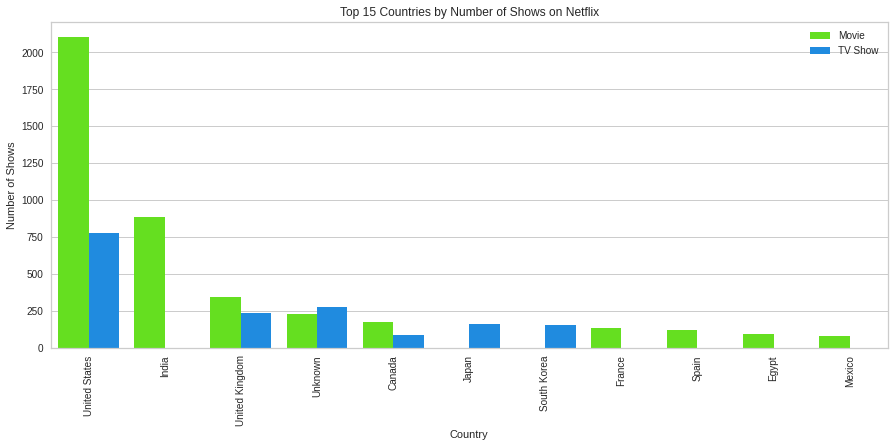

In [ ]:
# Chart - 8 visualization code
# group the data by country and type, and count the number of shows
df_country = df.groupby(['country', 'type'])['show_id'].count().reset_index()
df_country = df_country.sort_values(by='show_id', ascending=False)            # sort the data in descending order
plt.figure(figsize=(15, 6))
sns.barplot(data=df_country[:15], x='country', y='show_id', hue='type', palette="gist_rainbow")       # plot a bar chart of the top 15 countries
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Top 15 Countries by Number of Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

This chart was chosen because it provides insights into the top 15 countries with the highest number of shows on Netflix, based on the country and show type. It helps to identify the countries that have the most content available, which could be useful for content acquisition and localization strategies.

##### 2. What is/are the insight(s) found from the chart?



Answer Here
The chart shows that the United States has by far the most content available on Netflix, with over 2,000 shows. This is followed by India with over 800 shows and the United Kingdom with over 300 shows. The chart also shows that the majority of the content available in these countries are movies, with the exception of United Kingdom, which has a relatively even split between movies and TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, the gained insights can help to create a positive business impact by informing content acquisition and localization strategies.

1) For example, if a company is looking to expand its content library in a particular region, they can use this chart to identify the countries with the most content and prioritize acquiring content from those regions.
 
2) 
The chart can also be used to inform localization strategies, such as dubbing or subtitling, for the countries with the highest number of shows on Netflix. By providing localized content for these regions, companies can attract more viewers and increase their overall revenue.

#### Chart - 9. Actor vs TV Shows(Bivariate) 

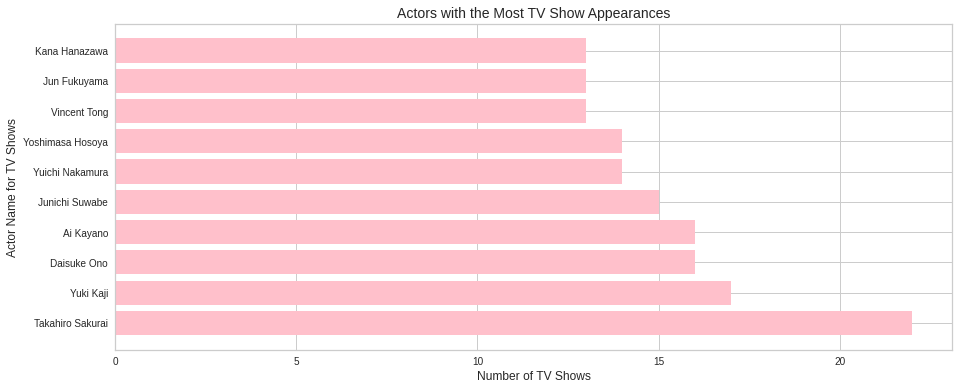

In [ ]:
# visualization code
# Selecting TV shows with known cast information
tv_shows = df[(df['type'] == 'TV Show') & ~(df['cast'] == 'Unknown')]
# Counting the number of TV shows each actor has appeared in
actor_counts = tv_shows['cast'].str.split(', ').explode().value_counts()
top_actors = actor_counts.head(10)             # Selecting the top 10 actors with the most TV show appearances
plt.figure(figsize=(15, 6))                    # Creating a horizontal bar plot of the top actors
plt.barh(top_actors.index, top_actors.values, color='pink')
plt.xlabel('Number of TV Shows', fontsize=12)
plt.ylabel('Actor Name for TV Shows', fontsize=12)
plt.title('Actors with the Most TV Show Appearances', fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

his chart visualize the top 10 actors with the most TV show appearances in a horizontal bar plot. This chart could be useful for understanding which actors are most frequently cast in TV shows and may be of interest to individuals in the entertainment industry or those interested in popular culture.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
The chart shows the top 10 actors who have appeared in the most TV shows on Netflix. The insight gained from the chart is that Takahiro Sakurai has appeared in the most TV shows on Netflix, followed by Yuki kaji and Daisuke Ono. These insights could be used to identify popular actors that could potentially draw in audiences for new TV show releases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
The gained insights could help creating a positive business impact by improving the selection of actors for TV shows. If popular actors are cast in a TV show, it could potentially attract more viewers, leading to a positive impact on the business. However, it is important to note that the popularity of an actor does not necessarily guarantee success, as the quality of the TV show itself is also a significant factor.

#### Chart - 10. Type VS Release year(Bivariate Analysis)

In [ ]:
df.release_year.value_counts()

2018    1120
2017    1012
2019     996
2016     881
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64

We can observe from the visualization that the number of shows released on Netflix has increased significantly in recent years, indicating that Netflix has gained more popularity in recent times.

Text(0.5, 1.0, 'Number of Shows Released Each Year Since 2008 on Netflix')

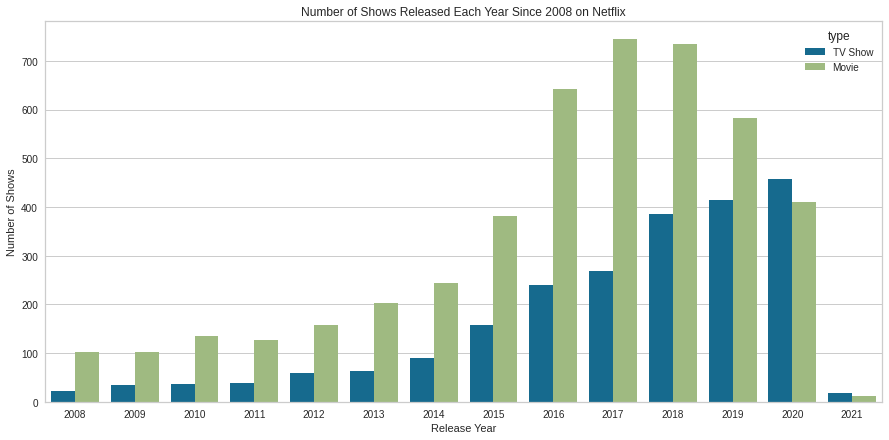

In [ ]:
# Chart - 10 visualization code
filtered_df = df[df['release_year'] >= 2008]
plt.figure(figsize=(15, 7))
sns.countplot(x='release_year', data=filtered_df, hue='type', order=range(2008, 2022))
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Number of Shows Released Each Year Since 2008 on Netflix')

##### 1. Why did you pick the specific chart?

I picked this chart because it shows the trend of the number of shows released each year since 2008, and it also shows the difference in the number of movies and TV shows released each year.

##### 2. What is/are the insight(s) found from the chart?


1) The number of TV shows released each year has been increasing steadily since 2008.

2) The number of TV shows released each year has been relatively stable with some fluctuations.

3) The difference between the number of movies and TV shows released each year has been increasing over time, indicating a shift towards more original movies content on Netflix

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights could help in creating a positive business impact by providing insights into the trend of content production on Netflix. By understanding the trend, Netflix can make strategic decisions on the type and quantity of content to produce in the future.

There are no insights that lead to negative growth in this chart.

#### Chart - 11. Release Month

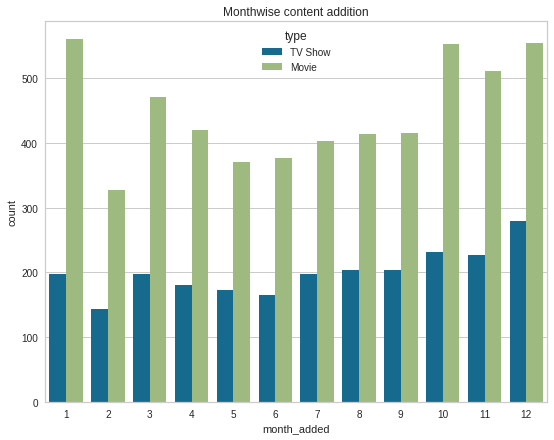

In [ ]:
# Chart - 11 visualization code
#Plotting a countplot for getting better insights from monthwise content addition
plt.figure(figsize=(9,7))
sns.countplot(x='month_added',hue='type',data=df)
plt.title("Monthwise content addition")
plt.show()

##### 1. Why did you pick the specific chart?


Countplot is used to visualize the frequency or count of occurrences of a categorical variable. It helps to understand the distribution of the variable by showing the number of observations in each category. The countplot is a bar graph, with the height of each bar representing the count of observations in each category. It provides a simple and easy way to compare the count of observations in different categories.

##### 2. What is/are the insight(s) found from the chart?

* We can clearly observe that on "January", "October" and in "December" there   is more stuff added on netflix.
* And in "February," there was relatively little substance added.
* Plotting a bar chart to see how many movies/shows have been added on average  on each month's days. 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The chart doesn't necessarily lead to negative growth insights, but it could identify areas for improvement. If there are particular months with low numbers of additions, Netflix may need to consider acquiring more content during those months or releasing more original content to fill the gaps. Additionally, if there are months with a high number of additions, Netflix may need to consider adjusting their release schedule to avoid overcrowding the platform with too much content at once.

#### Chart - 12. Seasons in each TV show

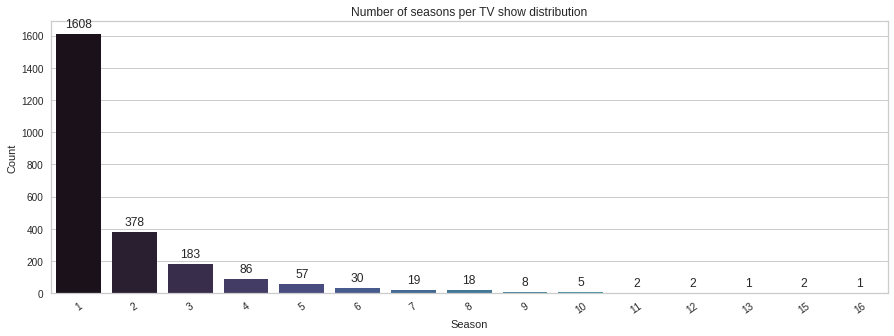

In [ ]:
# Chart - 12 visualization code
# Seasons in each TV show

plt.figure(figsize=(15,5))

# Filter the dataframe to only include TV shows
tv_shows_df = df[df['type']=='TV Show']

p = sns.countplot(x='duration',palette='mako',data=tv_shows_df)
plt.title('Number of seasons per TV show distribution')

# Add count annotations to each bar
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel('Season')
plt.ylabel('Count')
# Tilt the x-axis labels
plt.xticks(rotation=35)
plt.show()

##### 1. Why did you pick the specific chart?


Bar plots are used to compare the values of a categorical variable across different categories. The height of each bar represents the value of the variable for each category, making it easy to compare the values across categories. Bar plots can be used to visualize the distribution of a continuous or discrete variable, as well as the relationship between two variables.

##### 2. What is/are the insight(s) found from the chart?

*   1608 Tv series have 1 season
*   382 TV series had a follow up season.
*   After season 5 the number of TV Series with follow up season are in single digits.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1) This insight could help Netflix make decisions about the number of seasons to order for new shows. It suggests that shorter seasons may be more popular and more likely to be successful.

2) This information could also help inform negotiations with production companies for the length of a TV show.

#### Chart - 13

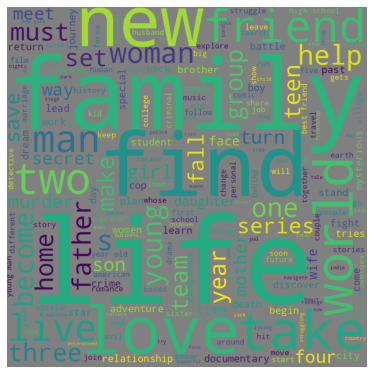

In [ ]:
# Chart - 13 visualization code
# Chart - 13 visualization code
# Join all the movie descriptions together into a single string
comment_words = ' '.join(df['description'].astype(str).str.lower())
stopwords = set(STOPWORDS)                                   # Define the stopwords
wordcloud = WordCloud(width=800, height=800,
                      background_color='gray',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)
plt.figure(figsize=(10,5), facecolor=None)                   # Plot the word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()                   

##### 1. Why did you pick the specific chart?

A word cloud, also known as a tag cloud, is a visual representation of the frequency of words in a text dataset. The size of each word in the cloud is proportional to its frequency of occurrence in the text, allowing the most frequent words to be easily identified. Word clouds provide a quick and simple way to gain insights into the content and structure of a text dataset, and to identify the most important or relevant words.

##### 2. What is/are the insight(s) found from the chart?

Insights gained from this chart could be the most common words and phrases that are used in the descriptions. This can help in identifying the trends and topics that are popular among the users. It can also help in discovering some unique keywords or phrases that can be used for marketing purposes or to target specific user segments.

As we can see in wordcloud, most common words in description are Life, Family, Friend, Love etc.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help create a positive business impact by allowing Netflix to better understand the interests of its users and tailor its content to meet those interests. By identifying popular themes and genres, Netflix can create more targeted marketing campaigns and improve the overall user experience.

#### Chart - 14 - Correlation Heatmap

<Axes: >

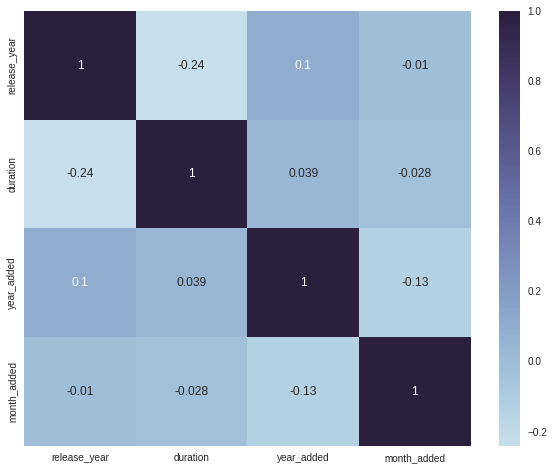

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap((correlation), annot=True, cmap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True))


##### 1. Why did you pick the specific chart?

The heatmap shows the correlation coefficients between different numerical columns of the Netflix dataset.

The heatmap uses a color scale to represent the correlation coefficients, where light colour represents positive correlation, dark colour represents negative correlation. The annotation parameter is set to True, which displays the correlation coefficient value inside each cell of the heatmap

##### 2. What is/are the insight(s) found from the chart?

This visualization can be helpful in identifying the strength and direction of the relationship between different variables in the dataset. By analyzing the heatmap, we can see which variables have a strong positive or negative correlation with each other. This information can be useful in making predictions and building machine learning models.

Overall, this heatmap can provide valuable insights into the relationships between different variables in the Netflix dataset.

1) We can see that duration and release year are negatively correlated by 24%.

2) year added and release year are positively correlated by 10%.

#### Chart - 15 - Pair Plot 

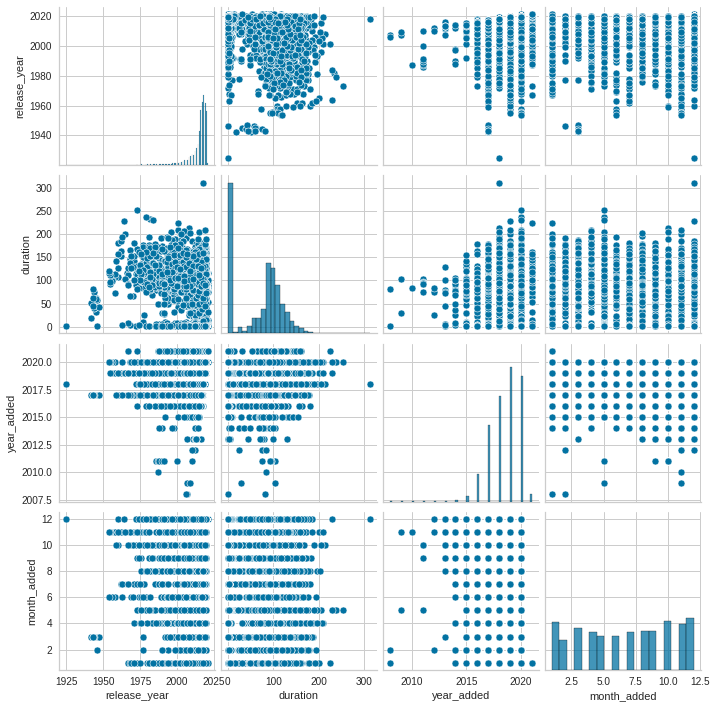

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot provides a scatter plot matrix of all numerical variables in the dataset, and histograms along the diagonal which can help visualize the relationships between each pair of variables.


##### 2. What is/are the insight(s) found from the chart?

1) The distribution of each variable, We can see the range and distribution of each variable from the diagonal plots. The distribution of the duration of movies and TV shows seems to be concentrated in certain ranges.

2) Correlation between variables, We can see the scatter plots of each pair of variables, as well as the correlation coefficient in the upper-right corner of each plot. There seems to be a positive correlation between the release year and the duration of movies and TV shows, indicating that newer movies and TV shows tend to be longer.

3) Outlier, We can also see any outliers in the data from the scatter plots. There seems to be a movie with a very long duration compared to the rest of the dataset.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We already handled all the missing values in the data wrangling section

### 2. Handling Outliers

<Axes: >

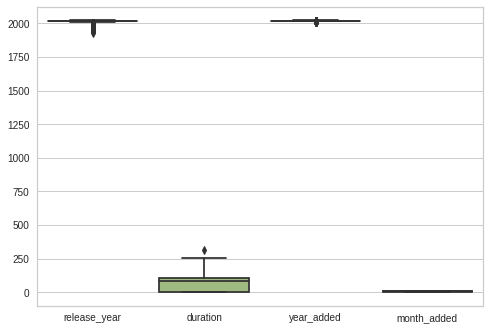

In [ ]:
# Handling Outliers & Outlier treatments
sns.boxplot(data=df)

##### What all outlier treatment techniques have you used and why did you use those techniques?

No need to handle the outliers

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# Using the model_df dataset for clustering since
# it does not require handling missing values
df = df.copy()  


In [ ]:
df.fillna('',inplace=True)
     

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
df['organized'] = (df['director'] + ' ' + 
                                df['cast'] +' ' + 
                                df['country'] +' ' + 
                                df['listed_in'] +' ' + 
                                df['description'])

In [ ]:
# Select the 100 number of clusters for the dataset 
df['organized'][100]

"Rajkumar Hirani Aamir Khan, Kareena Kapoor, Madhavan, Sharman Joshi, Omi Vaidya, Boman Irani, Mona Singh, Javed Jaffrey India Comedies While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."

#### 2. Lower Casing

In [ ]:
# # Lower Casing
# df['Lower_casing']= df['organized'].str.lower()

In [ ]:
# df.Lower_casing[100]

#### 3. Removing Punctuations

In [ ]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
     

In [ ]:
# applying remove_punctuation function to Removing punctuation marks
df['organized'] = df['organized'].apply(remove_punctuation)


In [ ]:
# Select the 100 number of clusters for the dataset 
df['organized'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

### 5. Removing Stopwords 

In [ ]:
# extracting the stopwords from nltk library
import nltk
nltk.download('stopwords')

stop_words = stopwords.words('english')

# displaying the stopwords
np.array(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
df['organized'] = df['organized'].apply(stopwords)

In [ ]:
# Select the 100 number of clusters for the dataset 
df['organized'][100]


'rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system'

Removing non-ASCII characters

In [ ]:
# function to remove non-ascii characters
import unicodedata
def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
     
     

In [ ]:
# remove non-ascii characters
df['organized'] = remove_non_ascii(df['organized'])
     

In [ ]:
# Select the 100 number of clusters for the dataset 
df['organized'][100]

'rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system'

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
#!pip install rephrase

In [ ]:
#from rephrase import Rephraser

In [ ]:
#rephraser = Rephraser()
#def rephrase_sentence(sentence):
#    return rephraser.rephrase(sentence)

In [ ]:
#df['rephrased_text'] = df['removed_whitespaces'].apply(rephrase_sentence)

#### 7. Tokenization

In [ ]:
# Create a reference variable for Class TweetTokenizer
tokenizer = TweetTokenizer()


In [ ]:
# Create text column based on dataset
df['organized'] = df['organized'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
# Select the 100 number of Tokenization for the dataset 
print(df['organized'][100])
    

['rajkumar', 'hirani', 'aamir', 'khan', 'kareena', 'kapoor', 'madhavan', 'sharman', 'joshi', 'omi', 'vaidya', 'boman', 'irani', 'mona', 'singh', 'javed', 'jaffrey', 'india', 'comedies', 'attending', 'one', 'indias', 'premier', 'colleges', 'three', 'miserable', 'engineering', 'students', 'best', 'friends', 'struggle', 'beat', 'schools', 'draconian', 'system']


#### 10. Text Vectorization

In [ ]:
# clustering tokens saved in a variable
clustering_vectors = df['organized']
     
     

In [ ]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
     
t_vectorizer = TfidfVectorizer(max_features=20000)
x= t_vectorizer.fit_transform(df['organized'])
# Dataset Rows & Columns count
x.shape

(7777, 20000)

In [ ]:
# convert X into array form for clustering
X = x.toarray()

     

In [ ]:

# Check the matrix
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##### Which text vectorization technique have you used and why?

We used the TF-IDF (Term Frequency-Inverse Document Frequency) text vectorization technique. 
TF-IDF is a technique which is used to find meaning of sentences consisting of words and cancels out the incapabilities of Bag of Words technique which is good for text classification or for helping a machine read words in numbers.

This helps to highlight the most important words in the document and down-weight the common words that do not provide much useful information for the analysis.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Not Needed

#### 2. Feature Selection

Not Needed

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Not Needed

### 6. Data Scaling

Not Needed

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, as we have a problem here with the huge dimensionality so we have to reduce the dimensions for effectiveness.

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=40)
pca.fit(X)
     

PCA(random_state=40)

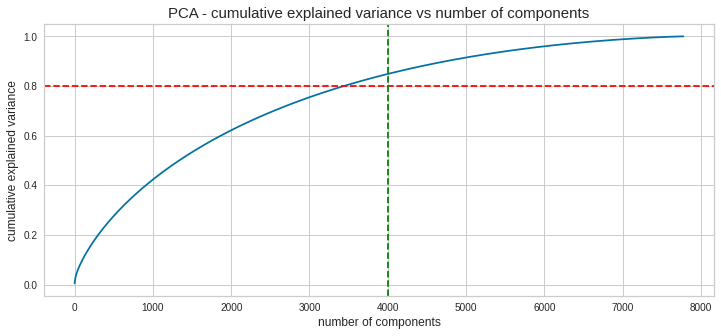

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components',fontsize=15)
plt.xlabel('number of components',fontsize=12)
plt.ylabel('cumulative explained variance',fontsize=12)
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 4000, color='green', linestyle='--')
plt.show()


In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=40)
pca.fit(X)

PCA(n_components=4000, random_state=40)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape


(7777, 4000)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while preserving as much information as possible. It is a common step in machine learning and data analysis, as high-dimensional datasets can be difficult to work with and can sometimes suffer from the curse of dimensionality.

### 8. Data Splitting

Not Needed

### 9. Handling Imbalanced Dataset

Not Needed

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***